<a href="https://colab.research.google.com/gist/fernandoferreira-me/61e9e4a25060f95abbfdb8cb90aaaed9/question-rio-projeto-de-disciplina-de-text-mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


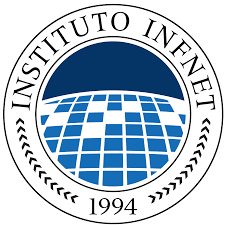



# **Processamento de linguagem natural com Python**

https://github.com/acrisandradee/NLPcomPython.git


Aluna: Cristina de assis andrade

Professor: Fernando Ferreira


---





# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

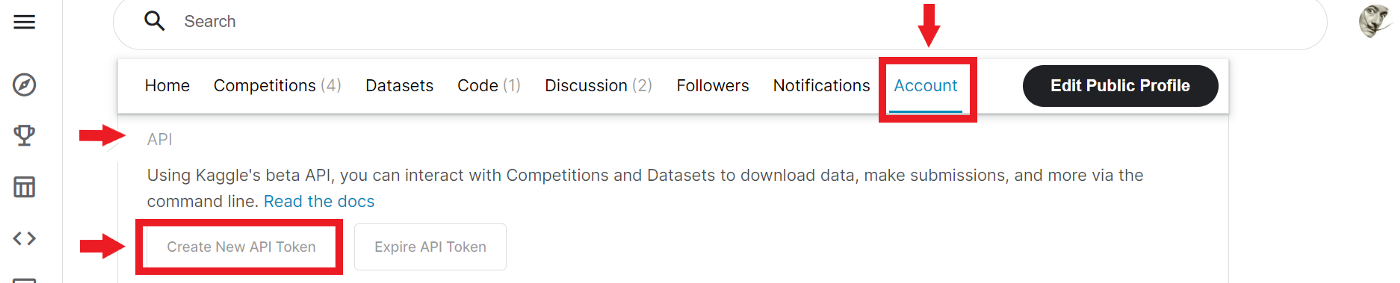

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [ ]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cristinaandrade","key":"7ebe8858f4de974e88d87ce12b949f49"}'}

Crie a pasta .kaggle

In [ ]:
#Ajuste pois estava apontado local errado
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Baixe o dataset

In [ ]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 85% 160M/187M [00:00<00:00, 278MB/s]
100% 187M/187M [00:00<00:00, 307MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

In [ ]:
df #Analisar o dataset

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...
...,...,...,...,...,...,...
167048,"Em cenário de crise, tucano Beto Richa assume ...",O tucano Beto Richa tinha tudo para começar se...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167049,Filho supera senador Renan Calheiros e assume ...,O economista Renan Filho (PMDB) assume nesta q...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167050,"Hoje na TV: Tottenham x Chelsea, Campeonato In...",Destaques da programação desta quinta-feira (1...,2015-01-01,esporte,NaN,http://www1.folha.uol.com.br/esporte/2015/01/1...
167051,Kim Jong-un diz estar aberto a se reunir com p...,"O líder norte-coreano, Kim Jong-un, disse nest...",2015-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2015/01/156...


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [ ]:
# Escreva seu código aqui
# ...
# Instala, atualiza o spaCy
!pip install --quiet -U spacy

# Baixa o modelo e português
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

#Carrega o modelo
nlp = spacy.load("pt_core_news_lg")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [ ]:
import nltk

# Escreva seu código aqui
from nltk.corpus import stopwords

nltk.download('stopwords')#baixa lista de 'palavras irrelevantes'(a,o,de,em,um)em varios idiomas
nltk.download('punkt')  #divide texto em frases e palavras com base em regras de pontuação e capitalização
nltk.download('punkt_tab')
nltk.download('rslp')  # reduz palavras em português ao seu radical , útil para agrupar variações com o mesmo sentido.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Carregar os módulos usados ao longo desse notebook

In [ ]:
!pip install pyldavis &> /dev/null

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [ ]:
df['date'] = pd.to_datetime(df.date)
# Create a dataframe named news_2016

# Filtra notícias publicadas em 2016 da categoria 'Mercado' com o dataframe nomeado 'news_2016'
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')]

# Exibe o número de notícias filtradas
print(f"total de notícias de 2016 na categoria 'Mercado': {len(news_2016)}\n")

# Visualiza  notícias filtradas
news_2016


total de notícias de 2016 na categoria 'Mercado': 7943



,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from typing import List
from tqdm.notebook import tqdm


# barra de progresso
tqdm.pandas()

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  #escreva seu código aqui
  tokens = word_tokenize(text, language="portuguese")
  stemmer = RSLPStemmer()
  stems = [stemmer.stem(token) for token in tokens if token.isalpha()]
  return stems


news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016

,title,text,date,category,subcategory,link,nltk_tokens
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d..."
...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, do, banc, san..."
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, saúd, boa, form, e, praz, as, tend, ..."
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, mais, pesso, são, for..."
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[o, brasil, pod, perd, até, milhã, de, vag, co..."


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [ ]:
# Escreva seu código aqui
# ...

# Carrega o modelo em Portugues
nlp = spacy.load("pt_core_news_lg")   # se já estiver carregado, pule esta linha

#barra de progresso
tqdm.pandas()
news_2016.loc[:, 'spacy_doc'] = news_2016["text"].progress_apply(nlp)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente..."
...,...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, do, banc, san...","(Para, o, economista, Rodolfo, Margato, ,, do,..."
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, saúd, boa, form, e, praz, as, tend, ...","(Conveniência, ,, saúde, ,, boa, forma, e, pra..."
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, mais, pesso, são, for...","(Com, o, rendimento, em, queda, ,, mais, pesso..."
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[o, brasil, pod, perd, até, milhã, de, vag, co...","(O, Brasil, pode, perder, até, 2,2, milhões, d..."


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [ ]:
from typing import List, Set
import nltk, spacy
from spacy.lang.pt.stop_words import STOP_WORDS

def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

termosForaLista = {"o", "em", "em o", "em a", "ano"}

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    return w.is_alpha and w.lemma_ not in complete_stopwords and w.lemma_ not in ["o", "em", "em o", "em a", "ano"]

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    return [tok.lemma_.lower() for tok in doc if filter(tok)]

import tqdm
tqdm.tqdm.pandas()

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

100%|██████████| 7943/7943 [00:05<00:00, 1427.39it/s]


In [ ]:
news_2016

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, de o, celular, controle, ficar, cara, ..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[de o, projeto, ajuste, de o, conta, público, ..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, de o, século, nota, ópera, sinfonia, ..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan..."
...,...,...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, do, banc, san...","(Para, o, economista, Rodolfo, Margato, ,, do,...","[economista, rodolfo, margato, de o, banco, sa..."
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, saúd, boa, form, e, praz, as, tend, ...","(Conveniência, ,, saúde, ,, boa, forma, e, pra...","[conveniência, saúde, prazer, tendência, consu..."
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, mais, pesso, são, for...","(Com, o, rendimento, em, queda, ,, mais, pesso...","[rendimento, queda, pessoa, forçar, buscar, fi..."
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[o, brasil, pod, perd, até, milhã, de, vag, co...","(O, Brasil, pode, perder, até, 2,2, milhões, d...","[brasil, perder, milhão, vaga, carteira, assin..."


## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [ ]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # Escreva seu código aqui

  return [ent.text for ent in doc.ents if ent.label_ == "ORG"] # deixa apenas as entidades cujo rótulo é "ORG" (organizaçao)


news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

100%|██████████| 7943/7943 [00:00<00:00, 14852.83it/s]


In [ ]:
news_2016

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, de o, celular, controle, ficar, cara, ...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[de o, projeto, ajuste, de o, conta, público, ...","[Executivo dos três Estados, Executivo, Assemb..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, de o, século, nota, ópera, sinfonia, ...","[MIT, Instituto de Tecnologia de Massachusetts..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na..."
...,...,...,...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, do, banc, san...","(Para, o, economista, Rodolfo, Margato, ,, do,...","[economista, rodolfo, margato, de o, banco, sa...","[Santander, FGV, Ibre]"
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, saúd, boa, form, e, praz, as, tend, ...","(Conveniência, ,, saúde, ,, boa, forma, e, pra...","[conveniência, saúde, prazer, tendência, consu...","[Nielsen, Nielsen, MAS NÃO QUEBRAM -, Nielsen,..."
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, mais, pesso, são, for...","(Com, o, rendimento, em, queda, ,, mais, pesso...","[rendimento, queda, pessoa, forçar, buscar, fi...","[Jovens, LCA, LCA]"
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[o, brasil, pod, perd, até, milhã, de, vag, co...","(O, Brasil, pode, perder, até, 2,2, milhões, d...","[brasil, perder, milhão, vaga, carteira, assin...","[LCA Consultores, GO Associados, PROCURA, Pnad..."


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [ ]:
from typing import List
from sklearn.feature_extraction.text import TfidfVectorizer

class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      # Escreva seu código aqui
      #...
      docs_as_str = [' '.join(tokens) for tokens in self.doc_tokens]
      tfidf_vec = TfidfVectorizer(
            max_features=5000,#número máximo de features s
            min_df=10, #minimo token
        )
      self.tfidf = tfidf_vec.fit(docs_as_str)# Ajusta o modelo
      return self.tfidf


  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

100%|██████████| 7943/7943 [00:10<00:00, 793.22it/s] 


In [ ]:
# Document-Term Matrix
dtm = pd.DataFrame(news_2016['tfidf'].to_list(),
                   columns=vectorizer().get_feature_names_out())


In [ ]:
news_2016

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, de o, celular, controle, ficar, cara, ...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[de o, projeto, ajuste, de o, conta, público, ...","[Executivo dos três Estados, Executivo, Assemb...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, de o, século, nota, ópera, sinfonia, ...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na...","[0.0, 0.0, 0.03916550819787641, 0.0, 0.0, 0.0,...",None
...,...,...,...,...,...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, do, banc, san...","(Para, o, economista, Rodolfo, Margato, ,, do,...","[economista, rodolfo, margato, de o, banco, sa...","[Santander, FGV, Ibre]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, saúd, boa, form, e, praz, as, tend, ...","(Conveniência, ,, saúde, ,, boa, forma, e, pra...","[conveniência, saúde, prazer, tendência, consu...","[Nielsen, Nielsen, MAS NÃO QUEBRAM -, Nielsen,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, mais, pesso, são, for...","(Com, o, rendimento, em, queda, ,, mais, pesso...","[rendimento, queda, pessoa, forçar, buscar, fi...","[Jovens, LCA, LCA]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[o, brasil, pod, perd, até, milhã, de, vag, co...","(O, Brasil, pode, perder, até, 2,2, milhões, d...","[brasil, perder, milhão, vaga, carteira, assin...","[LCA

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np


N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())

# modelo LDA com 9 tópicos
lda = LDA(
    n_components=N_TOKENS,  # Número de tópicos
    max_iter=100,           # Numero máximo de iterações
    random_state=SEED,
    learning_method='batch'
)

# Treina o modelo
lda.fit(corpus)

feature_names = vectorizer().get_feature_names_out()

def get_model_topics(model, feature_names, n_top_words=10):
    word_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[idx] for idx in top_features_ind]
        word_dict[f'Topic {topic_idx}'] = top_features
    return pd.DataFrame(word_dict)

topics_df = get_model_topics(lda, feature_names, n_top_words=10)

print(topics_df)


   Topic 0    Topic 1       Topic 2     Topic 3     Topic 4        Topic 5  \
0       de         de    declaração   extrativo     veículo  aposentadoria   
1  empresa     índice         ficha      batata   montadora          idade   
2  governo      queda       samsung        lyft       carro      benefício   
3      por      dólar  contribuinte   negociado       aéreo           inss   
4   bilhão       juro          note  escoamento         voo   contribuição   
5       em       alta            ir   embalagem   aeroporto       segurado   
6     este      banco    rendimento      tomate  volkswagen      aposentar   
7  afirmar    mercado      declarar     minério  passageiro    restituição   
8     país  trimestre    dependente    carnaval     embraer    previdência   
9   brasil   petróleo        galaxy   frankfurt    aeronave        perícia   

       Topic 6     Topic 7        Topic 8  
0     bandeira      cebrap      petrobras  
1           de      debate        energia  
2        

### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [ ]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # Escreva seu código aqui
    topics= lda.transform([tfidf])
    topic = np.argmax(topics)
    return topic

# Atribui o tópico ao documento, ajustando o índice para começar em 1
news_2016['topic'] = news_2016.tfidf.progress_map(lambda x: get_topic(x) + 1)


100%|██████████| 7943/7943 [00:06<00:00, 1201.82it/s]


In [ ]:
topic_counts = news_2016['topic'].value_counts().sort_index()

print(topic_counts)

topic
1    6070
2    1754
3      33
5      10
6      33
7      19
8      11
9      13
Name: count, dtype: int64


In [ ]:
news_2016

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, christine, conder, modést...","[Gbps, Ofcom, Cavamos, Membro da, Ordem do Imp...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, de o, celular, controle, ficar, cara, ...","[Oi, TIM, Claro, Vivo, Secretaria de Estado da...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[de o, projeto, ajuste, de o, conta, público, ...","[Executivo dos três Estados, Executivo, Assemb...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...","[década, de o, século, nota, ópera, sinfonia, ...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[cifras, letras, selecionar, semanalmente, lan...","[Singularity University, Sistema Financeiro Na...","[0.0, 0.0, 0.03916550819787641, 0.0, 0.0, 0.0,...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
94280,Previsões para economia dependem de rumos do g...,"Para o economista Rodolfo Margato, do banco Sa...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[par, o, econom, rodolf, margat, do, banc, san...","(Para, o, economista, Rodolfo, Margato, ,, do,...","[economista, rodolfo, margato, de o, banco, sa...","[Santander, FGV, Ibre]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
94295,Repelentes e água de coco lideram a lista de s...,"Conveniência, saúde, boa forma e prazer. As te...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[conveni, saúd, boa, form, e, praz, as, tend, ...","(Conveniência, ,, saúde, ,, boa, forma, e, pra...","[conveniência, saúde, prazer, tendência, consu...","[Nielsen, Nielsen, MAS NÃO QUEBRAM -, Nielsen,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
94301,Renda em queda leva mais pessoas às filas de e...,"Com o rendimento em queda, mais pessoas são fo...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[com, o, rend, em, qued, mais, pesso, são, for...","(Com, o, rendimento, em, queda, ,, mais, pesso...","[rendimento, queda, pessoa, forçar, buscar, fi...","[Jovens, LCA, LCA]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
94310,"Brasil pode perder até 2,2 milhões de vagas fo...","O Brasil pode perder até 2,2 milhões de vagas ...",2016-01-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/01/1...,"[o, brasil, pod, perd, até, milhã, de, vag, co...","(O, Brasil, pode, perder, até, 2,2, milhões, d...","[brasil, perder, milhão, vaga, carteira, assin...","[LCA Consultores, GO Associa

## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

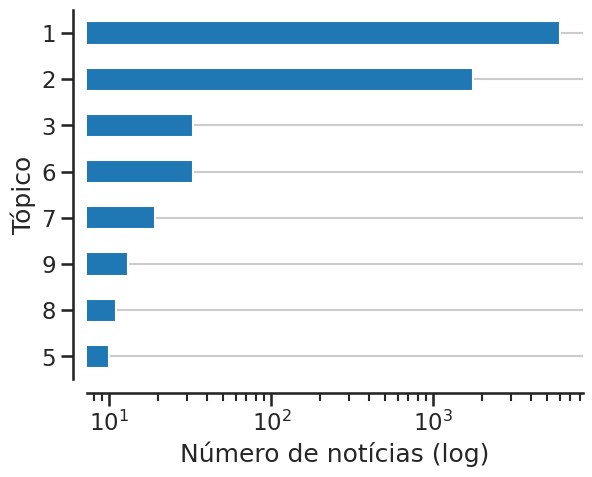

In [ ]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

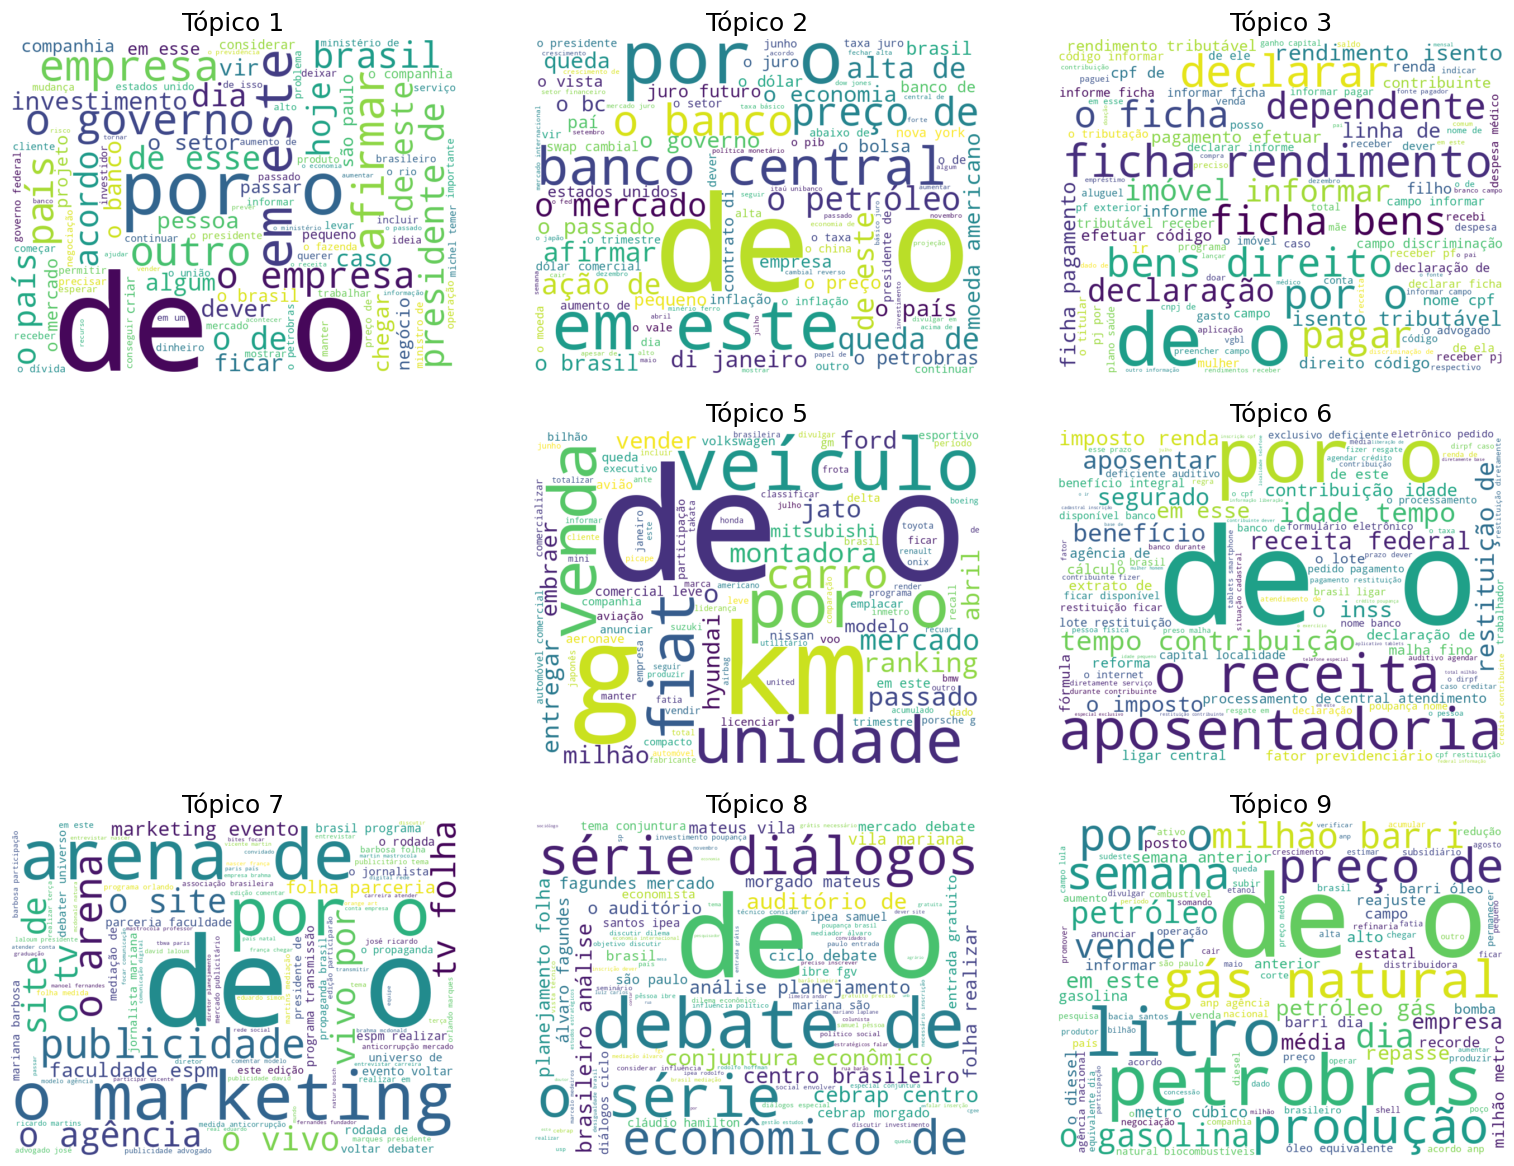

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain

def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    wordcloud = WordCloud(
      width=800,
      height=600,
      background_color='white',
      max_words=100
    ).generate(text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()
plt.show()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

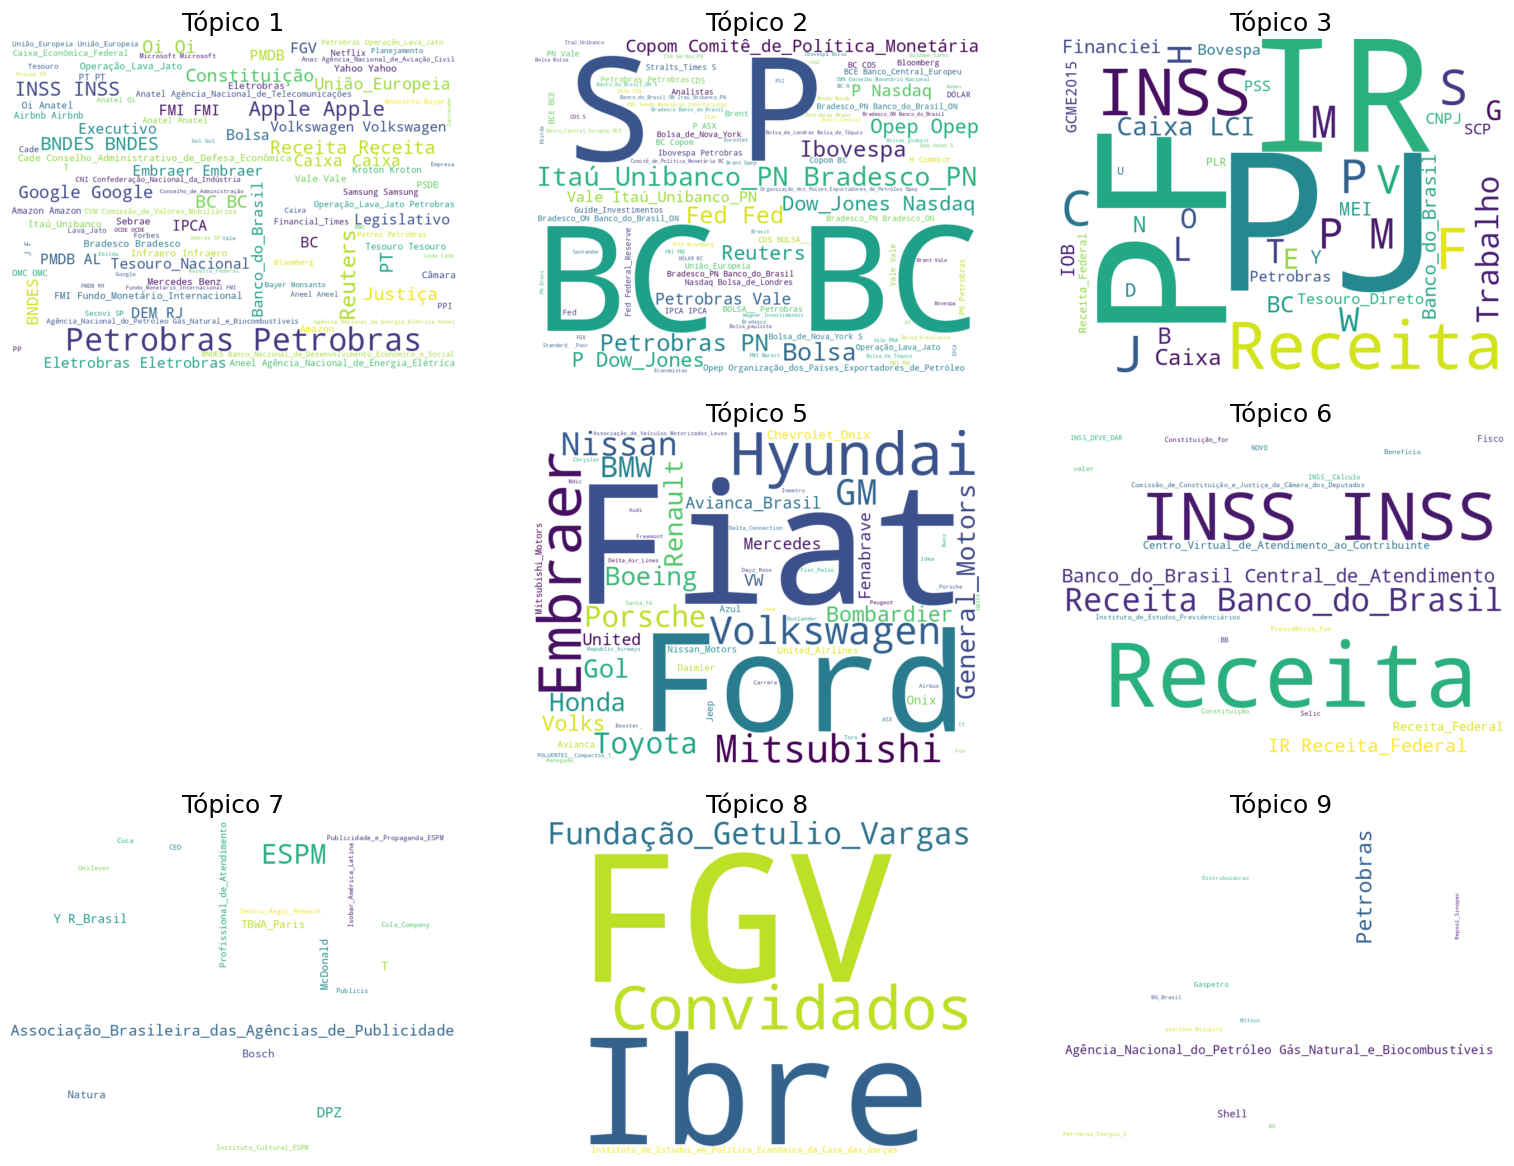

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain


def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()